In [1]:
from numpy import array

ket0 = array([1, 0])
ket1 = array([0, 1])

display(ket0 / 2 + ket1 / 2)

array([0.5, 0.5])

In [2]:
ket0 / 2 + ket1 / 2

array([0.5, 0.5])

In [3]:
M1 = array([[1, 1], [0, 0]])
M2 = array([[1, 1], [1, 0]])

M1 / 2 + M2 / 2

array([[1. , 1. ],
       [0.5, 0. ]])

In [7]:
from numpy import matmul

display(matmul(M1, ket1))
display(matmul(M1, M2))
matmul(M2, M1)

array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

In [8]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

In [11]:
display(u.draw("latex"))

<IPython.core.display.Latex object>

In [14]:
display(v.draw("latex"))

<IPython.core.display.Latex object>

In [13]:
display(u.is_valid())
display(w.is_valid())

True

False

In [17]:
v.measure()

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

In [20]:
v.measure()

('1',
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

In [22]:
try:
    w.measure()
except Exception as e:
    display(e)

ValueError('probabilities do not sum to 1')

{'0': 550, '1': 450}

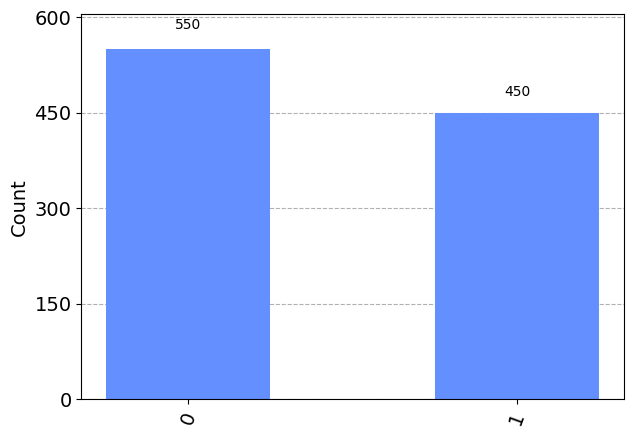

In [23]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

In [28]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]]) # Pauli-X (σx)
Y = Operator([[0, -1.0j], [1.0j, 0]]) # Pauli-Y (σy)
Z = Operator([[1, 0], [0, -1]]) # Pauli-Z (σz)
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]]) # Hadamard (H)
S = Operator([[1, 0], [0, 1.0j]]) # Phase π/2 (S)
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]]) # Phase π/8 (T)

v = Statevector([1, 0])

v = v.evolve(X)
v = v.evolve(Y)
v = v.evolve(Z)
v = v.evolve(S)

display(v.draw("text"))

v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw("text")

[0.-1.j,0.+0.j]

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

In [25]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [26]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

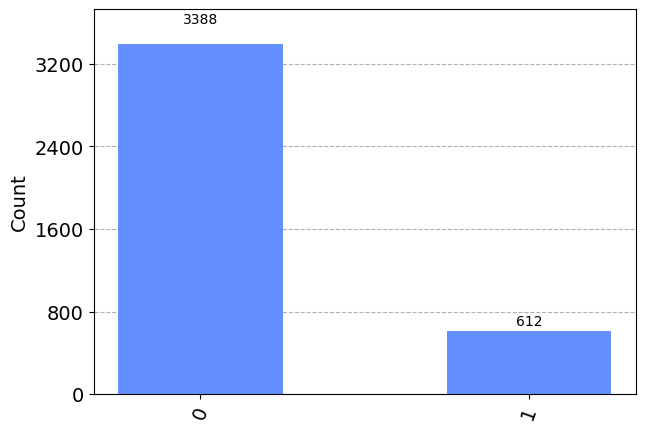

In [29]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)